In [12]:
import numpy as np
import pandas as pd

np.random.seed(42)

X = np.sort(10 * np.random.rand(1000, 1), axis=0)

y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=['Feature', 'Target'])

print("Перші 5 рядків даних для регресії:")
print(df.head())

Перші 5 рядків даних для регресії:
    Feature    Target
0  0.046320  0.081844
1  0.050616 -0.216475
2  0.055221  0.131233
3  0.069521  0.191582
4  0.091971  0.203799


In [13]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Розмір навчальної вибірки (X_train): {X_train.shape}")
print(f"Розмір тестової вибірки (X_test):  {X_test.shape}")

Розмір навчальної вибірки (X_train): (700, 1)
Розмір тестової вибірки (X_test):  (300, 1)


In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_models = {}

k_values = [1, 3, 10, 30]

print("--- Початок навчання k-NN регресорів ---")

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    knn_regressor.fit(X_train, y_train)
    
    knn_models[k] = knn_regressor
    
    print(f"Модель з k={k} успішно навчена.")

print("\n--- Усі моделі навчені ---")

--- Початок навчання k-NN регресорів ---
Модель з k=1 успішно навчена.
Модель з k=3 успішно навчена.
Модель з k=10 успішно навчена.
Модель з k=30 успішно навчена.

--- Усі моделі навчені ---


In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.sort(10 * np.random.rand(1000, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

k_range = range(1, 41)
test_r2_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    test_r2_scores.append(r2_score(y_test, y_test_pred))

best_k = np.argmax(test_r2_scores) + 1
best_r2_score = max(test_r2_scores)

print("\n--- Результат аналізу ---")
print(f"Найкращий показник якості (R² Score) на тестовій вибірці: {best_r2_score:.4f}")
print(f"\nОстаточний вибір для подальшої роботи: k = {best_k}.")


--- Результат аналізу ---
Найкращий показник якості (R² Score) на тестовій вибірці: 0.9168

Остаточний вибір для подальшої роботи: k = 19.


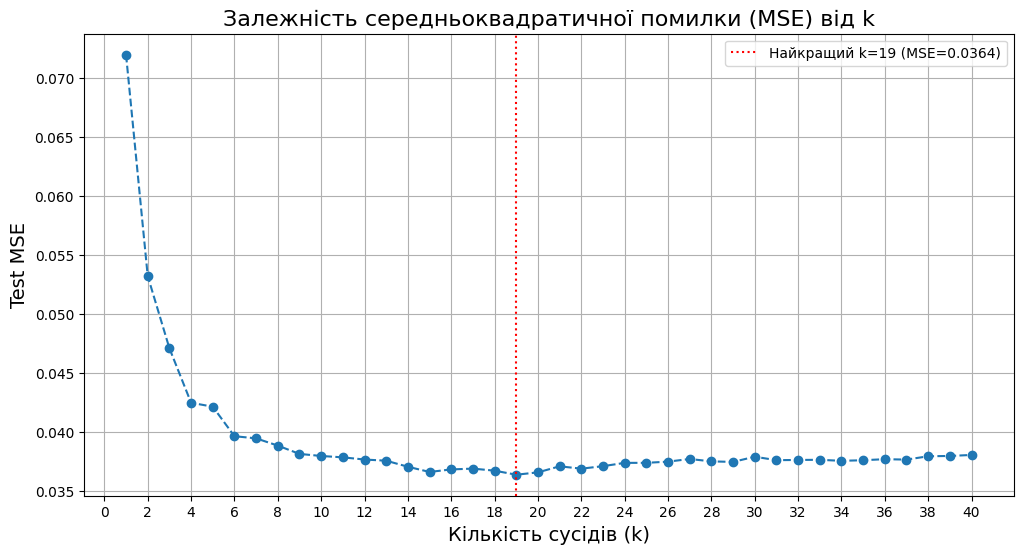

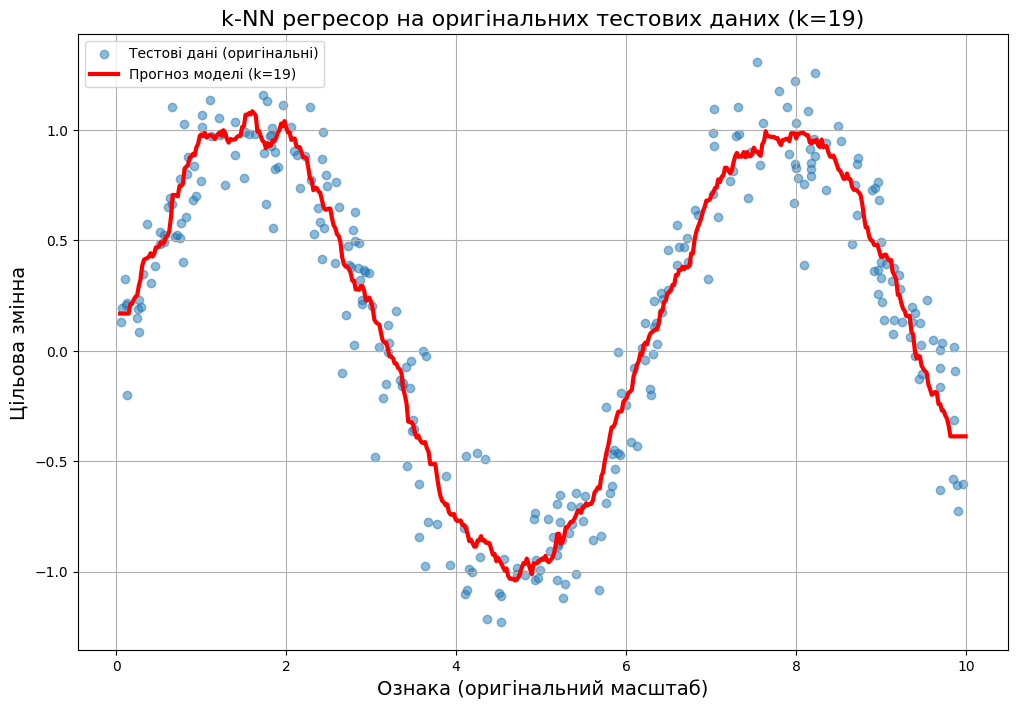

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_range = range(1, 41)
test_mse_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_mse_scores.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, test_mse_scores, marker='o', linestyle='--')

best_k_mse = np.argmin(test_mse_scores) + 1
min_mse_value = min(test_mse_scores)
plt.axvline(best_k_mse, color='red', linestyle=':', label=f'Найкращий k={best_k_mse} (MSE={min_mse_value:.4f})')

plt.title('Залежність середньоквадратичної помилки (MSE) від k', fontsize=16)
plt.xlabel('Кількість сусідів (k)', fontsize=14)
plt.ylabel('Test MSE', fontsize=14)
plt.xticks(np.arange(0, 41, 2))
plt.legend()
plt.grid(True)
plt.show()

best_k = 19

# Створюємо та навчаємо фінальну модель
best_model = KNeighborsRegressor(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Створюємо плавний діапазон для лінії прогнозу (на нормалізованих даних)
X_plot_scaled = np.linspace(X_scaled.min(), X_scaled.max(), 500).reshape(-1, 1)
y_plot_pred = best_model.predict(X_plot_scaled)

# Повертаємо дані до ОРИГІНАЛЬНОГО масштабу для візуалізації
# Використовуємо scaler_X, створений у завданні 2
X_test_orig = scaler_X.inverse_transform(X_test)
X_plot_orig = scaler_X.inverse_transform(X_plot_scaled)

# Візуалізація
plt.figure(figsize=(12, 8))
plt.scatter(X_test_orig, y_test, alpha=0.5, label='Тестові дані (оригінальні)')
plt.plot(X_plot_orig, y_plot_pred, color='red', linewidth=3, label=f'Прогноз моделі (k={best_k})')

plt.title(f'k-NN регресор на оригінальних тестових даних (k={best_k})', fontsize=16)
plt.xlabel('Ознака (оригінальний масштаб)', fontsize=14)
plt.ylabel('Цільова змінна', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()